# Compare Gamma and N event expected between formulas, generated without scanning, and KDE
# It does not compare physics quantities (observables)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from parameters_dict import physics_parameters
from dark_nus_utils import load_datasets
from plot_utils import set_plot_title, annotated_2d_plot
from exp_analysis_class import exp_analysis, gamma_general

In [5]:
my_exp_analyses = load_datasets()

heavy dirac
heavy majorana
light dirac
light majorana


## The Gamma profile

heavy dirac
heavy majorana
light dirac
light majorana


<ipython-input-6-344f50ea14c1>:10: RuntimeWarning: invalid value encountered in true_divide
  annotated_2d_plot(data=gamma_formula/gamma_grid_no_scan,


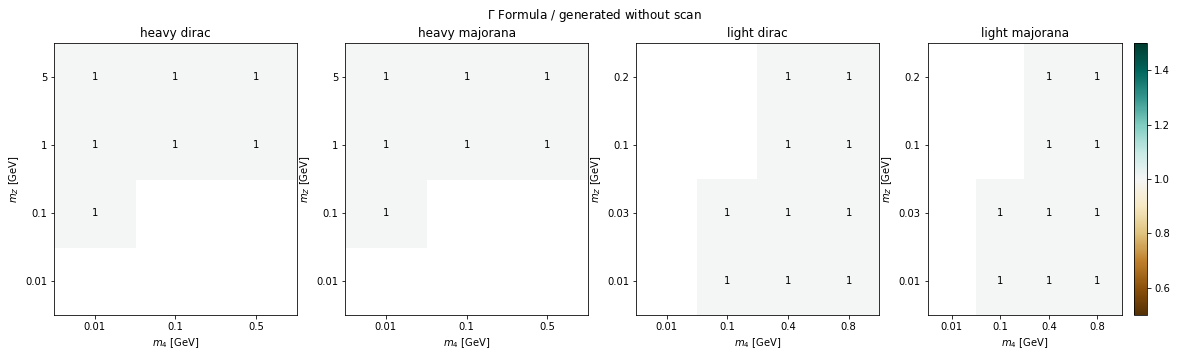

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=len(my_exp_analyses), figsize=(len(my_exp_analyses)*5, 5))
plt.suptitle(r'$\Gamma$ Formula / generated without scan')

for my_exp_analysis, ax in zip(my_exp_analyses.values(), axes):
    print(my_exp_analysis.hierarchy, my_exp_analysis.D_or_M)
    gamma_grid_no_scan = my_exp_analysis.no_scan_benchmark_grid(lambda x: x['total_decay_rate'][0])
    gamma_formula = my_exp_analysis.no_scan_benchmark_grid(lambda x: gamma_general(x['m4'][0], x['mzprime'][0], my_exp_analysis.Vmu4_alpha_epsilon2, my_exp_analysis.D_or_M))
    
    plt.sca(ax)
    annotated_2d_plot(data=gamma_formula/gamma_grid_no_scan,
                      xcenters=my_exp_analysis.m4_scan,
                      ycenters=my_exp_analysis.mz_scan,
                      xlabel =r'$m_4$ [GeV]',
                      ylabel=r'$m_Z$ [GeV]',
                      vmin=0.5,
                      vmax=1.5,
                      )
    
    set_plot_title(exp_analysis_obj=my_exp_analysis)

plt.colorbar()
plt.savefig('../fig/2_comparison_parameters/Gamma.pdf', bbox_inches='tight')

## The N events profile

In [5]:
for smoothing in ([0.001, 0.01], [0.005, 0.05], [0.01, 0.1]):
    fig, axes = plt.subplots(nrows=1, ncols=len(my_exp_analyses), figsize=(len(my_exp_analyses)*5, 5))
    plt.suptitle(r'N events KDE / generated without scan')

    for my_exp_analysis, ax in zip(my_exp_analyses.values(), axes):
        print(my_exp_analysis.hierarchy, my_exp_analysis.D_or_M)
        n_events_grid_no_scan = my_exp_analysis.no_scan_benchmark_grid(lambda x: x['actual_weight'].sum())
        n_events_err_kde = my_exp_analysis.kde_n_events_benchmark_grid(smoothing=smoothing)
        n_events_kde = n_events_err_kde[..., 0]
        n_events_kde_err = n_events_err_kde[..., 1]

        plt.sca(ax)
        annotated_2d_plot(data=n_events_kde/n_events_grid_no_scan,
                          xcenters=my_exp_analysis.m4_scan,
                          ycenters=my_exp_analysis.mz_scan,
                          xlabel =r'$m_4$ [GeV]',
                          ylabel=r'$m_Z$ [GeV]',
                          vmin=0.5,
                          vmax=1.5,
                          errors_to_annotate=n_events_kde_err/n_events_grid_no_scan
                          )

        set_plot_title(exp_analysis_obj=my_exp_analysis, smoothing_pars=smoothing)
    plt.colorbar()
    plt.savefig(f'../fig/2_comparison_parameters/N_events_smoothing{smoothing[0]}_{smoothing[1]}.pdf', bbox_inches='tight')
    plt.close()

heavy dirac


<ipython-input-5-d227f597051c>:13: RuntimeWarning: invalid value encountered in true_divide
  annotated_2d_plot(data=n_events_kde/n_events_grid_no_scan,
<ipython-input-5-d227f597051c>:20: RuntimeWarning: invalid value encountered in true_divide
  errors_to_annotate=n_events_kde_err/n_events_grid_no_scan


heavy majorana
light dirac
light majorana
heavy dirac


<ipython-input-5-d227f597051c>:13: RuntimeWarning: invalid value encountered in true_divide
  annotated_2d_plot(data=n_events_kde/n_events_grid_no_scan,
<ipython-input-5-d227f597051c>:20: RuntimeWarning: invalid value encountered in true_divide
  errors_to_annotate=n_events_kde_err/n_events_grid_no_scan


heavy majorana
light dirac
light majorana
heavy dirac


<ipython-input-5-d227f597051c>:13: RuntimeWarning: invalid value encountered in true_divide
  annotated_2d_plot(data=n_events_kde/n_events_grid_no_scan,
<ipython-input-5-d227f597051c>:20: RuntimeWarning: invalid value encountered in true_divide
  errors_to_annotate=n_events_kde_err/n_events_grid_no_scan


heavy majorana
light dirac
light majorana


## Add effective sample size

## Older plots

In [11]:
#compute Gamma all materials
gamma_no_scan = []
gamma_formula = []
gamma_formula_contact = []

for m4 in physics_parameters[case]['m4_scan']:
    gamma_no_scan.append([])
    gamma_formula.append([])
    gamma_formula_contact.append([])
    for mz in physics_parameters[case]['mz_scan']:
        if ((case == 'heavy') and (m4 >= mz)) or ((case == 'light') and (m4 <= mz)):
                gamma_no_scan[-1].append(0)
                gamma_formula[-1].append(0)
                gamma_formula_contact[-1].append(0)
                continue
        else:
            print(f'm4={m4}, mz={mz}')
            df = my_exp_analysis.load_df(m4, mz)
            gamma_no_scan[-1].append(df['weight_decay'].sum())

            gamma_formula[-1].append(gamma_heavy(m4, mz, 
                                                physics_parameters[case]['Vmu4_alpha_epsilon2'],  
                                                 D_or_M))
            
            gamma_formula_contact[-1].append(gamma_heavy_contact(m4, mz, 
                                                physics_parameters[case]['Vmu4_alpha_epsilon2'],
                                                D_or_M))

gamma_no_scan = np.array(gamma_no_scan)
gamma_formula = np.array(gamma_formula)
gamma_formula_contact = np.array(gamma_formula_contact)

m4=0.1, mz=0.01


NameError: name 'gamma_heavy' is not defined

In [ ]:
#compute Gamma KDE
gamma_kde = []

smoothing_pars = [0.005, 0.05]

m4_values = my_exp_analysis.df_base['m4']
mz_values = my_exp_analysis.df_base['mzprime']
df_values = np.stack([m4_values, mz_values], axis=-1)
weight_decay = my_exp_analysis.df_base['weight_decay'].values

for i, m4 in enumerate(physics_parameters[case]['m4_scan']):
    gamma_kde.append([])
    for j, mz in enumerate(physics_parameters[case]['mz_scan']):
        if ((case == 'heavy') and (m4 >= mz)) or ((case == 'light') and (m4 <= mz)):
                gamma_kde[-1].append(0)
                continue
        aux_kde = exp_analysis.kde_Nd_weights(np.array([m4, mz]), df_values, smoothing=smoothing_pars, kernel='epa')
        gamma_kde[-1].append((aux_kde*weight_decay).sum())

gamma_kde = np.array(gamma_kde)

In [ ]:
from matplotlib import colors

def annotated_2d_plot(data):
    divnorm = colors.TwoSlopeNorm(vcenter=1, vmin=0.9, vmax=2)
    plt.pcolormesh(data.T, cmap='BrBG', norm=divnorm)
    plt.xticks(ticks=np.arange(0.5, len(xcenters)),
               labels=xcenters)
    plt.yticks(ticks=np.arange(0.5, len(ycenters)),
               labels=ycenters)
    for i in range(len(xcenters)):
        for j in range(len(ycenters)):
            this_value = data[i,j]
            if np.isnan(this_value):
                continue
            text = plt.text(i + 0.5, j + 0.5, f"{data[i,j]:.3g}",
                            ha="center", va="center", color="k")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

xlabel = r'$m_4$ [GeV]'
ylabel = r'$m_Z$ [GeV]'

xcenters = physics_parameters[case]['m4_scan']
ycenters = physics_parameters[case]['mz_scan']
fig = plt.figure(figsize=(20, 6))
fig.suptitle('Ratio between estimate and generated without scanning')

plt.subplot(141)
annotated_2d_plot(gamma_formula/gamma_no_scan)
plt.title('Formula/Generated')

plt.subplot(142)
annotated_2d_plot(gamma_formula_contact/gamma_no_scan)
plt.title('Contact interaction formula/Generated')


plt.subplot(143)
annotated_2d_plot(gamma_formula_contact/gamma_formula)
plt.title('Contact interaction formula/formula')

plt.subplot(144)
annotated_2d_plot(gamma_kde/gamma_formula)
plt.title('KDE/formula')
plt.colorbar()

plt.savefig(save_folder + 'ratio_between_estimates_of_gamma.png', dpi=250)

## N event profile

In [12]:
# compute n_events without scanning
n_event_no_scan = []
sigma_n_event_no_scan = []
for m4 in physics_parameters[case]['m4_scan']:
    n_event_no_scan.append([])
    sigma_n_event_no_scan.append([])
    for mz in physics_parameters[case]['mz_scan']:
        if ((case == 'heavy') and (m4 >= mz)) or ((case == 'light') and (m4 <= mz)):
                n_event_no_scan[-1].append(0)
                sigma_n_event_no_scan[-1].append(0)
                continue
        else:
            df = my_exp_analysis.load_df(m4, mz)
            n_event_no_scan[-1].append(df['actual_weight'].sum())
            sigma_n_event_no_scan[-1].append(np.sqrt((df['actual_weight']**2).sum()))
n_event_no_scan = np.array(n_event_no_scan)
sigma_n_event_no_scan = np.array(sigma_n_event_no_scan)

In [13]:
# uncertaintis on n_event_no_scan
sigma_n_event_no_scan/n_event_no_scan

<ipython-input-13-caa42d5d97e5>:2: RuntimeWarning: invalid value encountered in true_divide
  sigma_n_event_no_scan/n_event_no_scan


array([[       nan,        nan,        nan,        nan],
       [0.00318245, 0.00308373,        nan,        nan],
       [0.00294884, 0.00293319, 0.00272526, 0.0026865 ],
       [0.00262955, 0.00259517, 0.00252168, 0.00256231]])

In [14]:
# compute n_events on a grid using the KDE
smoothing_pars = [0.005, 0.05]

m4_span = physics_parameters[case]['m4_scan']
mz_span = np.linspace(*physics_parameters[case]['mz_limits'], 18)
grid_to_eval = np.stack(np.meshgrid(m4_span, mz_span, indexing='ij'), axis=-1)
m4_values = my_exp_analysis.df_base['m4']
mz_values = my_exp_analysis.df_base['mzprime']
df_values = np.stack([m4_values, mz_values], axis=-1)

this_kde_weights = exp_analysis.kde_Nd_weights(grid_to_eval, df_values, smoothing=smoothing_pars, kernel='epa')
actual_weight = my_exp_analysis.df_base['actual_weight'].values
final_weights = this_kde_weights * actual_weight[:, np.newaxis, np.newaxis]
n_event_grid = np.sum(final_weights, axis=0)
n_event_std_grid = np.sqrt(np.sum(final_weights**2, axis=0))

bin_width_m4 = 0.01
bins_mz = 20
bin_range_mz = [0, 10]
bin_size = (bin_range_mz[1] - bin_range_mz[0])/bins_mz * bin_width_m4

In [15]:
# ctau = 25
# for mask in ['trivial', 'selected', f'decay_in_tpc_{ctau}', f'total_selected_{ctau}']:
for i, m4 in enumerate(physics_parameters[case]['m4_scan']):
    plt.plot(physics_parameters[case]['mz_scan'], n_event_no_scan[i], 'o', label='Generated without scanning')
    n_event_est = n_event_grid[i]
    n_event_std = n_event_std_grid[i]
    plt.plot(mz_span, n_event_est, label=f'kde 2d, $k_{{m_4}}$={smoothing_pars[0]:.2g}, $k_{{m_Z}}$={smoothing_pars[1]:.2g}')
    plt.fill_between(mz_span, n_event_est-n_event_std, n_event_est+n_event_std, alpha=0.25, color=plt.gca().lines[-1].get_color(), interpolate=True)

    this_mask = (m4_values > (m4-bin_width_m4/2)) & (m4_values < (m4+bin_width_m4/2))        

    out = plt.hist(mz_values[this_mask], bins=bins_mz, range=bin_range_mz,
                weights=actual_weight[this_mask]/bin_size,
                histtype='step', label='histogram')

    plt.legend(frameon=False, loc='upper right')
    plt.xlabel(r"$M_Z'$ [GeV]")
    plt.ylabel('Expected number of entries')
    plt.yscale('log')
    # plt.ylim(0, 1e-7)
    # plt.xlim(bin_range)
    plt.title(f'N random = {my_exp_analysis.n_evt}\n{case} mediator, $m_4$ = {m4} GeV')
    plt.tight_layout()
    plt.savefig(save_folder+f'nevt_{my_exp_analysis.n_evt}_m4_{m4}.png', dpi=250)
    plt.close()

# The 2d plot

In [17]:
n_event_kde = []
sigma_n_event_kde = []
smoothing_pars = [0.005, 0.05]

for i, m4 in enumerate(physics_parameters[case]['m4_scan']):
        n_event_kde.append([])
    sigma_n_event_kde.append([])
    for j, mz in enumerate(physics_parameters[case]['mz_scan']):
        if ((case == 'heavy') and (m4 >= mz)) or ((case == 'light') and (m4 <= mz)):
                n_event_kde[-1].append(0)
                sigma_n_event_kde[-1].append(0)
                continue
        aux_kde = exp_analysis.kde_Nd_weights(np.array([m4, mz]), df_values, smoothing=smoothing_pars, kernel='epa')
        n_event_kde[-1].append((aux_kde*actual_weight).sum())
        sigma_n_event_kde[-1].append(np.sqrt(((aux_kde*actual_weight)**2).sum()))

n_event_kde = np.array(n_event_kde)

<ipython-input-18-036ccd734eb1>:12: RuntimeWarning: invalid value encountered in true_divide
  ratio_n_event = n_event_kde/n_event_no_scan
<ipython-input-18-036ccd734eb1>:13: RuntimeWarning: invalid value encountered in true_divide
  sigma_ratio_n_event = sigma_n_event_kde/n_event_no_scan


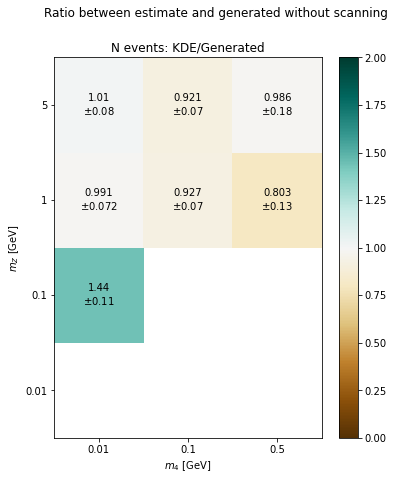

In [18]:
from matplotlib import colors

xlabel = r'$m_4$ [GeV]'
ylabel = r'$m_Z$ [GeV]'

xcenters = physics_parameters[case]['m4_scan']
ycenters = physics_parameters[case]['mz_scan']
fig = plt.figure(figsize=(6, 7))
fig.suptitle('Ratio between estimate and generated without scanning')

plt.subplot(111)
ratio_n_event = n_event_kde/n_event_no_scan
sigma_ratio_n_event = sigma_n_event_kde/n_event_no_scan
divnorm = colors.TwoSlopeNorm(vcenter=1, vmin=0, vmax=2)
plt.pcolormesh(ratio_n_event.T, cmap='BrBG', norm=divnorm)
plt.xticks(ticks=np.arange(0.5, len(xcenters)),
           labels=xcenters)
plt.yticks(ticks=np.arange(0.5, len(ycenters)),
           labels=ycenters)
for i in range(len(xcenters)):
    for j in range(len(ycenters)):
        this_value = ratio_n_event[i,j]
        if np.isnan(this_value):
            continue
        text = plt.text(i + 0.5, j + 0.5, f"{ratio_n_event[i,j]:.3g}\n$\pm${sigma_ratio_n_event[i,j]:.2g}",
                        ha="center", va="center", color="k")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('N events: KDE/Generated')
plt.colorbar()
plt.savefig(save_folder + 'ratio_between_estimates_of_n_events.png', dpi=250)

# Effective sample size

In [48]:
from scipy.stats import binned_statistic, binned_statistic_2d

def effective_sample_size(weights):
    return np.sum(weights)**2/np.sum(np.power(weights, 2))

def ratio_weighted_unweighted(weights):
    return np.sum(weights)/len(weights)

In [49]:
case = 'light'
D_or_M = 'dirac'
save_folder = ('../fig/2_comparison_parameters/' + case + '/')
!mkdir -p $save_folder
my_exp_analysis = exp_analysis(case,D_or_M)
my_exp_analysis.load_df_base(100000)

In [50]:
m4_values = my_exp_analysis.df_base['m4']
mz_values = my_exp_analysis.df_base['mzprime']
weight_decay_values = my_exp_analysis.df_base['weight_decay']
weight_values = my_exp_analysis.df_base['weight']

# m4

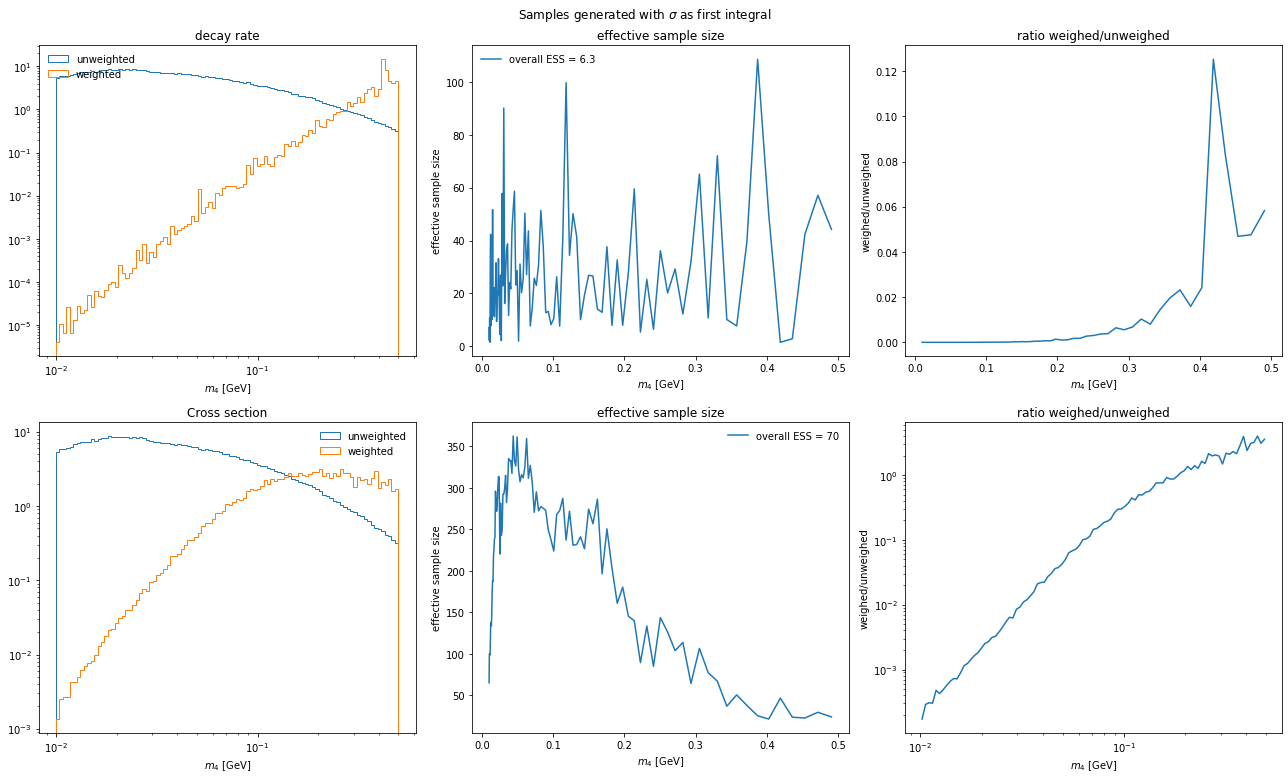

In [51]:
this_sample = m4_values
xlabel = r'$m_4$ [GeV]'
bins = np.logspace(-2,np.log10(0.5),100)

fig = plt.figure(figsize=[18, 11])
fig.suptitle(f'Samples generated with $\sigma$ as first integral')

plt.subplot(231)
plt.hist(this_sample, 
         density=True, 
         label='unweighted',
         histtype='step',
        bins=bins)
plt.hist(this_sample, 
         weights=weight_decay_values, 
         density=True, 
         label='weighted',
         histtype='step',
        bins=bins)
plt.legend(frameon=False, loc='upper left')
plt.title('decay rate')
plt.xlabel(xlabel)
plt.yscale('log')
plt.xscale('log')

plt.subplot(232)
result = binned_statistic(this_sample, weight_decay_values, 
                 statistic=effective_sample_size,
                 bins=bins)
bin_centers = (result[1][:-1] + result[1][1:])/2
plt.plot(bin_centers, result[0], label=f'overall ESS = {effective_sample_size(weight_decay_values):.2g}')
plt.legend(frameon=False)
plt.xlabel(xlabel)
plt.ylabel('effective sample size')
plt.title('effective sample size')

plt.subplot(233)
result = binned_statistic(this_sample, weight_decay_values, 
                 statistic=ratio_weighted_unweighted,
                 bins=bins)
bin_centers = (result[1][:-1] + result[1][1:])/2
plt.plot(bin_centers, result[0]*len(weight_decay_values)/weight_decay_values.sum())
plt.xlabel(xlabel)
plt.ylabel('weighed/unweighed')
plt.title('ratio weighed/unweighed')



plt.subplot(234)
plt.hist(this_sample, 
         density=True, 
         label='unweighted',
         histtype='step',
        bins=bins)

plt.hist(this_sample, 
         weights=weight_values, 
         density=True, 
         label='weighted',
         histtype='step',
        bins=bins)
plt.legend(frameon=False, loc='upper right')
plt.title('Cross section')
plt.xlabel(xlabel)
plt.yscale('log')
plt.xscale('log')

plt.subplot(235)
result = binned_statistic(this_sample, weight_values, 
                 statistic=effective_sample_size,
                 bins=bins)
bin_centers = (result[1][:-1] + result[1][1:])/2
plt.plot(bin_centers, result[0], label=f'overall ESS = {effective_sample_size(weight_values):.2g}')
plt.legend(frameon=False)
plt.xlabel(xlabel)
plt.ylabel('effective sample size')
plt.title('effective sample size')

plt.subplot(236)
result = binned_statistic(this_sample, weight_values, 
                 statistic=ratio_weighted_unweighted,
                 bins=bins)
bin_centers = (result[1][:-1] + result[1][1:])/2
plt.plot(bin_centers, result[0]*len(weight_values)/weight_values.sum())
plt.xlabel(xlabel)
plt.ylabel('weighed/unweighed')
plt.title('ratio weighed/unweighed')
plt.yscale('log')
plt.xscale('log')

plt.tight_layout()
plt.savefig(save_folder+'m4_weights.png', dpi=250)

# Mzprime

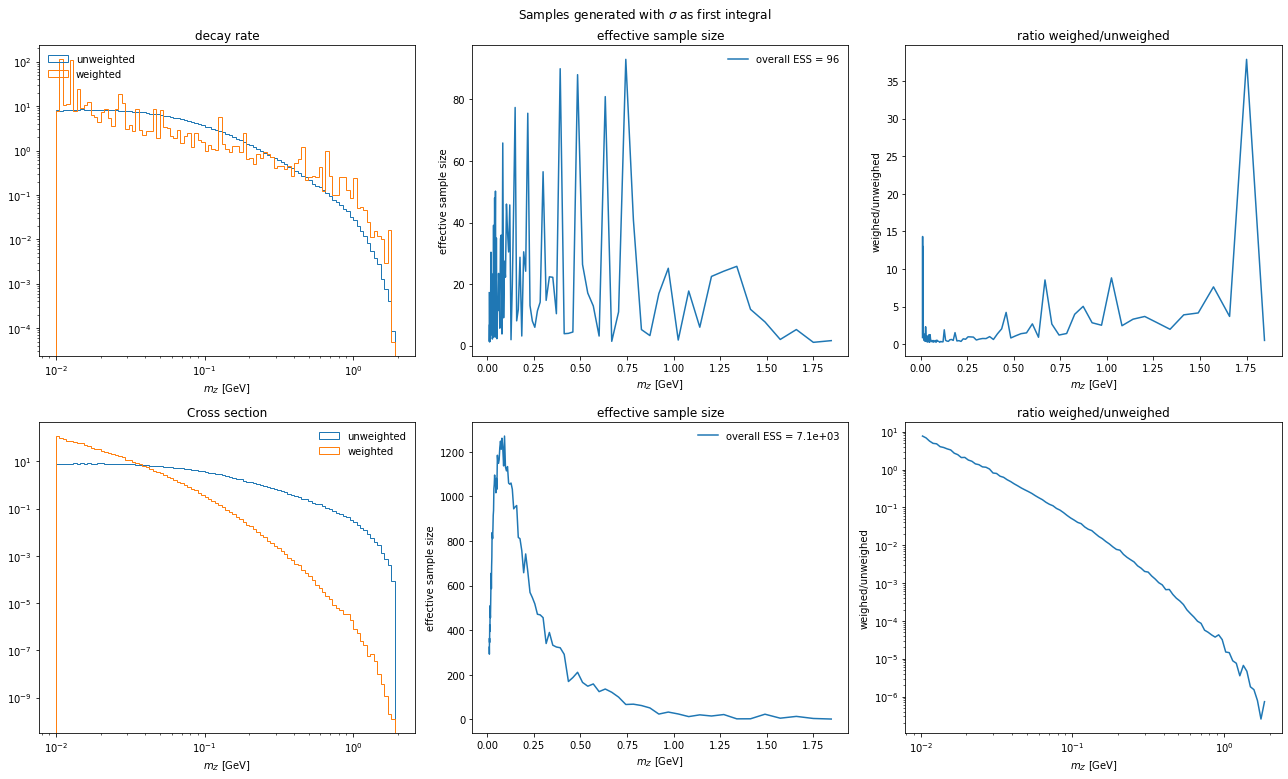

In [24]:
this_sample = mz_values
xlabel = r'$m_Z$ [GeV]'
bins = np.logspace(-2,np.log10(2),100)

fig = plt.figure(figsize=[18, 11])
fig.suptitle(f'Samples generated with $\sigma$ as first integral')

plt.subplot(231)
plt.hist(this_sample, 
         density=True, 
         label='unweighted',
         histtype='step',
        bins=bins)
plt.hist(this_sample, 
         weights=weight_decay_values, 
         density=True, 
         label='weighted',
         histtype='step',
        bins=bins)
plt.legend(frameon=False, loc='upper left')
plt.title('decay rate')
plt.xlabel(xlabel)
plt.yscale('log')
plt.xscale('log')

plt.subplot(232)
result = binned_statistic(this_sample, weight_decay_values, 
                 statistic=effective_sample_size,
                 bins=bins)
bin_centers = (result[1][:-1] + result[1][1:])/2
plt.plot(bin_centers, result[0], label=f'overall ESS = {effective_sample_size(weight_decay_values):.2g}')
plt.legend(frameon=False)
plt.xlabel(xlabel)
plt.ylabel('effective sample size')
plt.title('effective sample size')

plt.subplot(233)
result = binned_statistic(this_sample, weight_decay_values, 
                 statistic=ratio_weighted_unweighted,
                 bins=bins)
bin_centers = (result[1][:-1] + result[1][1:])/2
plt.plot(bin_centers, result[0]*len(weight_decay_values)/weight_decay_values.sum())
plt.xlabel(xlabel)
plt.ylabel('weighed/unweighed')
plt.title('ratio weighed/unweighed')



plt.subplot(234)
plt.hist(this_sample, 
         density=True, 
         label='unweighted',
         histtype='step',
        bins=bins)
plt.hist(this_sample, 
         weights=weight_values, 
         density=True, 
         label='weighted',
         histtype='step',
        bins=bins)
plt.legend(frameon=False, loc='upper right')
plt.title('Cross section')
plt.xlabel(xlabel)
plt.yscale('log')
plt.xscale('log')

plt.subplot(235)
result = binned_statistic(this_sample, weight_values, 
                 statistic=effective_sample_size,
                 bins=bins)
bin_centers = (result[1][:-1] + result[1][1:])/2
plt.plot(bin_centers, result[0], label=f'overall ESS = {effective_sample_size(weight_values):.2g}')
plt.legend(frameon=False)
plt.xlabel(xlabel)
plt.ylabel('effective sample size')
plt.title('effective sample size')

plt.subplot(236)
result = binned_statistic(this_sample, weight_values, 
                 statistic=ratio_weighted_unweighted,
                 bins=bins)
bin_centers = (result[1][:-1] + result[1][1:])/2
plt.plot(bin_centers, result[0]*len(weight_values)/weight_values.sum())
plt.xlabel(xlabel)
plt.ylabel('weighed/unweighed')
plt.title('ratio weighed/unweighed')
plt.yscale('log')
plt.xscale('log')

plt.tight_layout()
plt.savefig(save_folder+'mz_weights.png', dpi=250)

# Binned statistics 2d

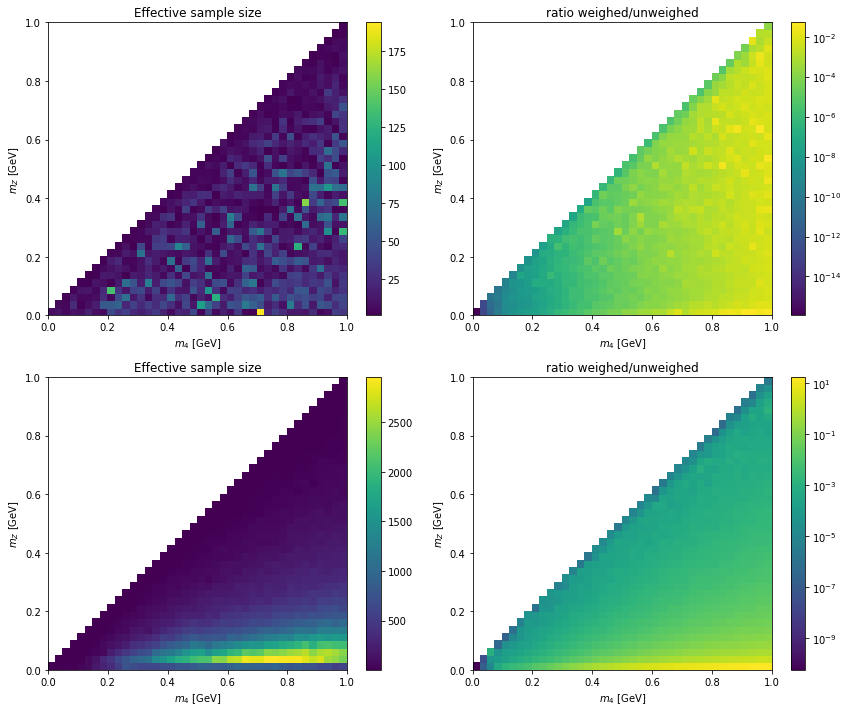

In [33]:
from matplotlib.colors import LogNorm

plt.figure(figsize=[12, 10])
fig.suptitle(f'Samples generated with $\Gamma$ as first integral')

this_bins = (40, 40)
this_range = ((0, 1), (0, 1))
xlabel = r'$m_4$ [GeV]'
ylabel = r'$m_Z$ [GeV]'
plt.subplot(221)
result = binned_statistic_2d(m4_values, mz_values, weight_decay_values, 
                 statistic=effective_sample_size,
                 bins=this_bins, range=this_range)
plt.pcolormesh(result[1], result[2], result[0].T)
plt.colorbar()
plt.title('Effective sample size')
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.subplot(222)
result = binned_statistic_2d(m4_values, mz_values, weight_decay_values, 
                 statistic=ratio_weighted_unweighted,
                 bins=this_bins, range=this_range)
plt.pcolormesh(result[1], result[2], result[0].T*len(weight_decay_values)/weight_decay_values.sum(), norm=LogNorm())
plt.colorbar()
plt.title('ratio weighed/unweighed')
plt.xlabel(xlabel)
plt.ylabel(ylabel)

# this_bins = (5, 5)

plt.subplot(223)
result = binned_statistic_2d(m4_values, mz_values, weight_values, 
                 statistic=effective_sample_size,
                 bins=this_bins, range=this_range)
plt.pcolormesh(result[1], result[2], result[0].T)
plt.colorbar()
plt.title('Effective sample size')
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.subplot(224)
result = binned_statistic_2d(m4_values, mz_values, weight_values, 
                 statistic=ratio_weighted_unweighted,
                 bins=this_bins, range=this_range)
plt.pcolormesh(result[1], result[2], result[0].T*len(weight_values)/weight_values.sum(), norm=LogNorm())
plt.colorbar()
plt.title('ratio weighed/unweighed')
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.tight_layout()
plt.savefig(save_folder + f'ess_2d.png', dpi=250)